## Import Modules

In [ ]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score 
from sklearn import metrics
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# from catboost import CatBoostClassifier
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Read the File

In [ ]:
data = pd.read_csv('gdrive/MyDrive/Delivery.csv')
data = shuffle(data)
data.head()

,pH,BDecf,pCO2,BE,Apgar1,Apgar5,NICU days,Seizures,HIE,Intubation,...,Induced,I.stage,NoProgress,CK/KP,II.stage,dbID,Rec. Type,Pos. II.st.,Sig2Birth,Delivery Type
421,7.23,2.43,7.8,-4.5,9,10,0.0,0.0,0.0,0.0,...,0,297,0,0,20,1092068,1,14400,0,1
171,7.12,8.13,8.2,-10.4,4,6,0.0,0.0,0.0,0.0,...,0,495,0,0,20,1041145,1,14400,0,1
174,7.24,2.64,7.5,-5.0,9,9,0.0,0.0,0.0,0.0,...,0,40,0,0,10,1042300,1,14400,0,1
54,7.28,2.49,6.7,-4.4,9,10,0.0,0.0,0.0,0.0,...,1,80,0,0,10,1008803,2,14400,0,1
382,7.47,NaN,NaN,NaN,10,10,0.0,0.0,0.0,0.0,...,0,100,0,0,15,1079554,1,14400,0,1


## **Check for Missing values**

In [ ]:
data.shape

(552, 35)

In [ ]:
data.isnull().sum()

pH                 0
BDecf             11
pCO2              11
BE                11
Apgar1             0
Apgar5             0
NICU days         92
Seizures          92
HIE               92
Intubation        92
Main diag.        92
Other diag.       92
Gestation(wks)     0
Weight(g)          1
Sex                0
Age                0
Gravidity          4
Parity             0
Diabetes           0
Hypertension       0
Preeclampsia       0
Liq. Praecox       0
Pyrexia            0
Meconium           0
Presentation       3
Induced            0
I.stage            0
NoProgress         0
CK/KP              0
II.stage           0
dbID               0
Rec. Type          0
Pos. II.st.        0
Sig2Birth          0
Delivery Type      0
dtype: int64

In [ ]:
#statistical measures about the data
data.describe()

,pH,BDecf,pCO2,BE,Apgar1,Apgar5,NICU days,Seizures,HIE,Intubation,...,Induced,I.stage,NoProgress,CK/KP,II.stage,dbID,Rec. Type,Pos. II.st.,Sig2Birth,Delivery Type
count,552.000000,541.000000,541.000000,541.000000,552.000000,552.000000,460.0,460.0,460.0,460.0,...,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02,552.000000,552.000000,552.0,552.000000
mean,7.230054,4.601904,7.069501,-6.384104,8.262681,9.068841,0.0,0.0,0.0,0.0,...,0.393116,934.798913,0.099638,0.025362,12.456522,1.053090e+06,1.875000,13241.315217,0.0,1.083333
std,0.105039,3.553392,1.556686,3.827455,1.624959,1.085613,0.0,0.0,0.0,0.0,...,0.488885,16736.184811,0.299788,0.157366,8.233101,3.450331e+04,2.668079,4012.185116,0.0,0.276636
min,6.850000,-3.400000,0.700000,-26.800000,1.000000,4.000000,0.0,0.0,0.0,0.0,...,0.000000,-30.000000,0.000000,0.000000,-1.000000,9.742040e+05,-1.000000,-1.000000,0.0,1.000000
25%,7.170000,2.490000,5.900000,-8.000000,8.000000,9.000000,0.0,0.0,0.0,0.0,...,0.000000,135.000000,0.000000,0.000000,5.000000,1.026766e+06,1.000000,14400.000000,0.0,1.000000
50%,7.250000,4.130000,7.000000,-5.600000,9.000000,9.000000,0.0,0.0,0.0,0.0,...,0.000000,218.500000,0.000000,0.000000,10.000000,1.056252e+06,1.000000,14400.000000,0.0,1.000000
75%,7.300000,6.140000,7.900000,-4.000000,9.000000,10.000000,0.0,0.0,0.0,0.0,...,1.000000,290.000000,0.000000,0.000000,20.000000,1.074182e+06,1.000000,14400.000000,0.0,1.000000
max,7.470000,26.110000,12.300000,-0.200000,10.000000,10.000000,0.0,0.0,0.0,0.0,...,1.000000,393425.000000,1.000000,1.000000,30.000000,1.117886e+06,12.000000,19277.000000,0.0,2.000000


In [ ]:
#Fill missing values with mean
data.fillna(value=data.mean(), inplace=True)

In [ ]:
data.isnull().sum()

pH                0
BDecf             0
pCO2              0
BE                0
Apgar1            0
Apgar5            0
NICU days         0
Seizures          0
HIE               0
Intubation        0
Main diag.        0
Other diag.       0
Gestation(wks)    0
Weight(g)         0
Sex               0
Age               0
Gravidity         0
Parity            0
Diabetes          0
Hypertension      0
Preeclampsia      0
Liq. Praecox      0
Pyrexia           0
Meconium          0
Presentation      0
Induced           0
I.stage           0
NoProgress        0
CK/KP             0
II.stage          0
dbID              0
Rec. Type         0
Pos. II.st.       0
Sig2Birth         0
Delivery Type     0
dtype: int64

In [ ]:
#information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pH              552 non-null    float64
 1   BDecf           552 non-null    float64
 2   pCO2            552 non-null    float64
 3   BE              552 non-null    float64
 4   Apgar1          552 non-null    int64  
 5   Apgar5          552 non-null    int64  
 6   NICU days       552 non-null    float64
 7   Seizures        552 non-null    float64
 8   HIE             552 non-null    float64
 9   Intubation      552 non-null    float64
 10  Main diag.      552 non-null    float64
 11  Other diag.     552 non-null    float64
 12  Gestation(wks)  552 non-null    int64  
 13  Weight(g)       552 non-null    float64
 14  Sex             552 non-null    int64  
 15  Age             552 non-null    int64  
 16  Gravidity       552 non-null    float64
 17  Parity          552 non-null    int

In [ ]:
data['dbID'].value_counts()

1042878    1
1064428    1
992640     1
1062845    1
1072204    1
          ..
985623     1
1032732    1
1038867    1
1058269    1
1063266    1
Name: dbID, Length: 552, dtype: int64

In [ ]:
data.head()

,pH,BDecf,pCO2,BE,Apgar1,Apgar5,NICU days,Seizures,HIE,Intubation,...,Induced,I.stage,NoProgress,CK/KP,II.stage,dbID,Rec. Type,Pos. II.st.,Sig2Birth,Delivery Type
533,7.18,4.820000,8.100000,-7.200000,8,9,0.0,0.0,0.0,0.0,...,1,125,1,0,-1,1042878,12,-1,0,2
215,7.30,-0.150000,7.100000,-1.200000,9,10,0.0,0.0,0.0,0.0,...,0,239,0,0,10,1051146,1,14400,0,1
4,7.30,4.520000,5.700000,-5.800000,9,10,0.0,0.0,0.0,0.0,...,1,114,0,0,15,983398,1,14400,0,1
340,7.14,3.760000,9.600000,-6.800000,9,10,0.0,0.0,0.0,0.0,...,1,146,1,0,5,1070205,1,14400,0,1
43,6.92,4.601904,7.069501,-6.384104,8,9,0.0,0.0,0.0,0.0,...,0,160,0,0,25,1006772,1,14400,0,1


## Feature Selection

[0.02635038 0.02553893 0.01190635 0.03185577 0.01660787 0.01132252
 0.         0.         0.         0.         0.         0.
 0.01046699 0.01297348 0.00679331 0.01465686 0.00888018 0.00785102
 0.00263998 0.00294424 0.00279423 0.00708378 0.00160655 0.00377799
 0.0139013  0.01321515 0.01756757 0.13035579 0.07906383 0.14959878
 0.01777859 0.01812993 0.35433863 0.        ]


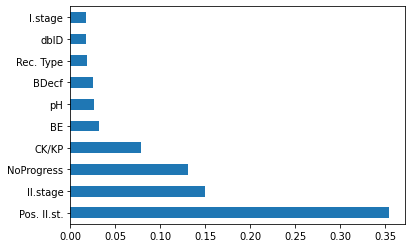

In [ ]:
X = data.iloc[:,0:34]  #independent columns
y = data.iloc[:,-1]    #target column i.e Delivery Type
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
feat_importances.nlargest(10)

Pos. II.st.    0.354339
II.stage       0.149599
NoProgress     0.130356
CK/KP          0.079064
BE             0.031856
pH             0.026350
BDecf          0.025539
Rec. Type      0.018130
dbID           0.017779
I.stage        0.017568
dtype: float64

In [ ]:
import_feat = data[['II.stage','NoProgress','CK/KP','BDecf','BE','I.stage','pH','Apgar1','Delivery Type']]

In [ ]:
data['I.stage'].unique()

array([   297,    495,     40,     80,    100,    290,    130,    267,
          168,    407,     66,    537,     85,    280,    175,    185,
          129,    160,    145,     15,    150,    648,    385,    117,
          224,    230,    197,    -30,    210,    241,    270,    165,
          313,     13,    189,    239,    112,    215,    340,    105,
          195,    103,    375,    209,    207,    355,    281,    146,
          225,    127,    415,     90,    155,    265,    501,    276,
          320,    480,    107,    115,     91,     35,    251,    250,
          489,    437,    141,    357,    275,     65,     95,    243,
          260,    110,    196,    125,     38,    315,    246,    212,
          296,    120,    240,    158,    330,    242,    255,    460,
          235,    405,     68,    390,    164,    135,    116,     70,
          190,    325,    180,     46,    156,    200,    159,     97,
          410,    285,    266,    335,    113,    108,    367,    363,
      

In [ ]:
import_feat

,II.stage,NoProgress,CK/KP,BDecf,BE,I.stage,pH,Apgar1,Delivery Type
533,-1,1,0,4.820000,-7.200000,125,7.18,8,2
215,10,0,0,-0.150000,-1.200000,239,7.30,9,1
4,15,0,0,4.520000,-5.800000,114,7.30,9,1
340,5,1,0,3.760000,-6.800000,146,7.14,9,1
43,25,0,0,4.601904,-6.384104,160,6.92,8,1
...,...,...,...,...,...,...,...,...,...
420,10,0,0,5.760000,-6.800000,285,7.29,9,1
467,15,0,0,6.110000,-8.800000,135,7.11,9,1
539,-1,1,0,4.601904,-6.384104,460,7.34,9,2
450,10,0,0,9.050000,-12.100000,225,7.05,7,1


In [ ]:
import sklearn

In [ ]:
sklearn.__version__

'1.0.2'

In [ ]:
#Just checking somethings out
check_run = data[['Gravidity','Parity','Diabetes', 'Hypertension', 'Preeclampsia','Delivery Type']]

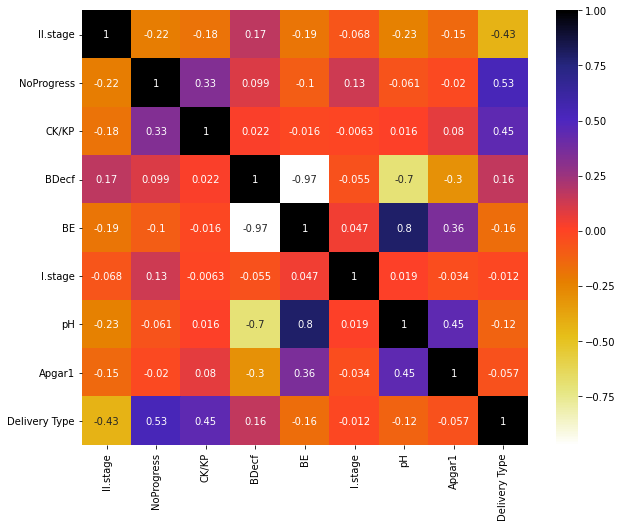

In [ ]:
#Checking the corelation between the important features and the target feature
plt.figure(figsize=(10,8))
corr = import_feat.corr()
sns.heatmap(corr, annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
y = import_feat['Delivery Type']
X = import_feat.drop(columns=['Delivery Type'])

In [ ]:
#splitting the data into training and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=2)

In [ ]:
x_train.shape, x_test.shape

((441, 8), (111, 8))

In [ ]:
#We now create an object of class LogisticRegression() to train the model on
# CBC = CatBoostClassifier()
SVM = SVC()
KNC = KNeighborsClassifier()
GBC = GradientBoostingClassifier()

In [ ]:
#here we fit our training dataset into the model
# CBC.fit(x_train, y_train)
SVM.fit(x_train, y_train)
KNC.fit(x_train, y_train)
GBC.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
#prediction for the test data (x_test)
# CBC_prediction = CBC.predict(x_test)
SVM_prediction = SVM.predict(x_test)
KNC_prediction = KNC.predict(x_test)
GBC_prediction = GBC.predict(x_test)

#prediction for the training data (x_train)
# CBC_x_train_prediction = CBC.predict(x_train)
SVM_x_train_prediction = SVM.predict(x_train)
KNC_x_train_prediction = KNC.predict(x_train)
GBC_x_train_prediction = GBC.predict(x_train)

In [ ]:
# accuracy_CBC = metrics.accuracy_score(y_test, CBC_prediction)
accuracy_SVM = metrics.accuracy_score(y_test, SVM_prediction)
accuracy_KNC = metrics.accuracy_score(y_test, KNC_prediction)
accuracy_GBC = metrics.accuracy_score(y_test, GBC_prediction)

In [ ]:
#print accuracy score for training dataset
# print('Accuracy on training data for CBC: ',accuracy_score(y_train, CBC_x_train_prediction))
print('Accuracy on training data for SVM: ',accuracy_score(y_train, SVM_x_train_prediction)*100)
print('Accuracy on training data for KNC: ',accuracy_score(y_train, KNC_x_train_prediction)*100)
print('Accuracy on training data for GBC: ',accuracy_score(y_train, GBC_x_train_prediction)*100)

Accuracy on training data for SVM:  91.60997732426304
Accuracy on training data for KNC:  93.19727891156462
Accuracy on training data for GBC:  100.0


In [ ]:
# print('Test accuracy for CBC: ',accuracy_CBC, '\n')
print('Test accuracy for SVM: ',accuracy_SVM*100, '\n')
print('Test accuracy for KNC: ',accuracy_KNC*100, '\n')
print('Test accuracy for GBC: ',accuracy_GBC*100, '\n')

Test accuracy for SVM:  91.8918918918919 

Test accuracy for KNC:  91.8918918918919 

Test accuracy for GBC:  97.2972972972973 



## Save Model with Pickle

In [ ]:
filename = 'Delivery_Model_GBC.pkl'
pickle.dump(GBC, open(filename, 'wb'))

In [ ]:
load_model = pickle.load(open(filename, 'rb'))

In [ ]:
input_data = (14400,20,0,0,8.140000,-10.500000,232,974204,7.14,6)
input_data_numpy = np.asarray(input_data)
input_data_reshape = input_data_numpy.reshape(1,-1)

In [ ]:
input_data_reshape.shape

(1, 10)

In [ ]:
import_feat.head()

,II.stage,NoProgress,CK/KP,BDecf,BE,I.stage,pH,Apgar1,Delivery Type
533,-1,1,0,4.820000,-7.200000,125,7.18,8,2
215,10,0,0,-0.150000,-1.200000,239,7.30,9,1
4,15,0,0,4.520000,-5.800000,114,7.30,9,1
340,5,1,0,3.760000,-6.800000,146,7.14,9,1
43,25,0,0,4.601904,-6.384104,160,6.92,8,1


In [ ]:
# input_data = [20,0,0,8.12,-10.5,232,7.14,8]
# input_data = [-1,1,0,4.820000,-7.200000,125,7.18,8]
input_data = [10,0,0,-0.150000,-1.200000,239,7.30,9]
feat = ['II.stage','NoProgress','CK/KP','BDecf','BE','I.stage','pH','Apgar1']
input_data_nd = np.asarray(input_data)
ty = input_data_nd.reshape(-1, len(input_data))
# input_data_nd
input_data_df = pd.DataFrame(ty, columns=feat)

In [ ]:
input_data_df

,II.stage,NoProgress,CK/KP,BDecf,BE,I.stage,pH,Apgar1
0,10.0,0.0,0.0,-0.15,-1.2,239.0,7.3,9.0


In [ ]:
prediction = load_model.predict(input_data_df)
if prediction[0] == 1:
  print("Vaginal Birth")
else:
  print("Caeserean Section")

Vaginal Birth
